In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal, ROUND_HALF_UP

import warnings
warnings.filterwarnings('ignore')
import time

In [106]:
train_data=pd.read_csv('./input/train.csv')
test_data=pd.read_csv('./input/test.csv')
passengerId=test_data['PassengerId']
combine=[train_data,test_data]

In [107]:
pd.unique(train_data['SibSp'])

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [108]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 数据探索

#### 查看数据的基本信息
    
    我们可以看到训练数据中的 Age，Cabin,Embarked 存在缺失值
    
    训测试据中的 Age，Cabin,Fare 存在缺失值

In [110]:
train_data.info()
print('**'*20)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [111]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### df.describe(include=['O']) 可以帮我们计算出非数字列的一些内容

In [112]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lobb, Mr. William Arthur",male,347082,B96 B98,S
freq,1,577,7,4,644


### 接下来探索特征和存活率之间的关系
    
    as_index=False 时会自动创建index，否则使用第一列作为index

__Sex__ 和 __Survived__ 之间的关系

In [113]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


__Pclass__ 和 __Survived__ 之间的关系

In [114]:
train_data.groupby(['Pclass'],as_index=False)['Pclass','Survived'].mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


__SibSp__ 和 __Survived__ 之间的关系

In [115]:
train_data.groupby(['SibSp'],as_index=False)['SibSp','Survived'].mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


__Parch__ 和 __Survived__ 之间的关系

In [116]:
train_data.groupby(['Parch'],as_index=False)['Parch','Survived'].mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 可视化展示特征和Surviced之间的关系

__Sex__ 和 __Survived__ 之间的关系展示图

    .plot.bar() 这里我们不能将as_index设为False 了

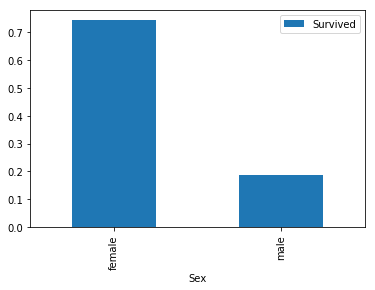

In [117]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

__Age__ 和 __Survived__ 的关系展示图

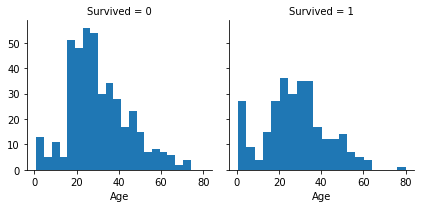

In [118]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

__Pclass__ 和 __Survived__ 的关系展示图

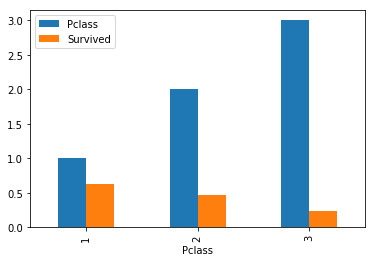

In [119]:
train_data.groupby(['Pclass'])['Pclass','Survived'].mean().plot.bar()

__Age__ __Pclass__ 和 __Survived__ 的关系展示图

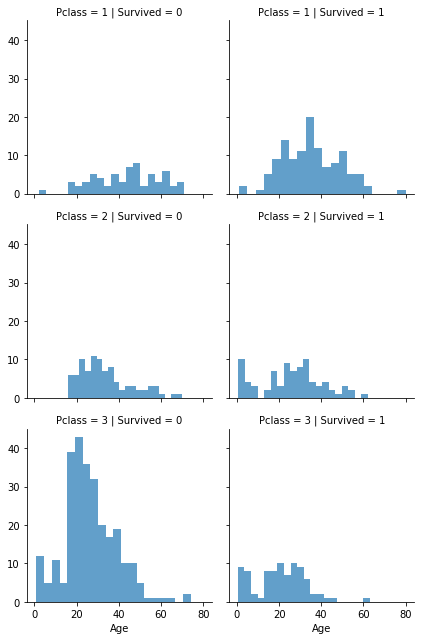

In [120]:
g=sns.FacetGrid(train_data,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20,alpha=.7)

__Age__ __Pclass__ __Sex__ 和 __Survived__ 的关系展示图

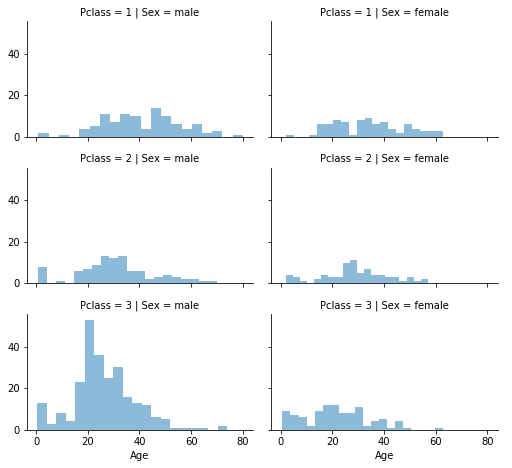

In [121]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# 特征工程

请注意，在适用的情况下，我们同时对训练和测试数据集执行操作以保持一致。

In [122]:
## Concat train and test into a variable "all_data"
survivers = train_data.Survived

train_data.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train_data,test_data], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

All the cabin names start with an English alphabet following by digits. It seems like there are some passengers that had booked multiple cabin rooms in their name, This is because many of them travelled with family. However, they all seem to book under the same letter followed by different numbers. It seems like there is a significance with the letters rather than the numbers. Therefore, we can group these cabins according to the letter of the cabin name.



In [123]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

Now, I don't feel comfortable hanging around with 687 null values that we fakely named "N". So, let's do something about that. We can use pythons ***groupby*** function to get the mean of each cabin letter. 

In [124]:
with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [125]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

In [126]:
##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

In [127]:
## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train_data = all_data[:891]

test_data = all_data[891:]

# adding saved target variable with train. 
train_data['Survived'] = survivers

In [162]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# train_data['Cabin']=le.fit_transform(train_data['Cabin'])
# test_data['Cabin']=le.fit_transform(test_data['Cabin'])
# combine=[train_data,test_data]
# train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,Isalone
0,3,1,1,0,6,2,0,2,0
1,1,0,2,0,2,0,1,3,0
2,3,0,1,0,6,2,1,1,1
3,1,0,2,0,2,2,1,3,0
4,3,1,2,0,6,2,0,2,1


#### 因为 Cabin 的缺失值太多，Ticket 表示票号(没有意义的特征) 所以我们将这两个特征进行删除

In [130]:
print("处理前", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

# train_data = train_data.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
# test_data = test_data.drop(['Ticket', 'Cabin','PassengerId'], axis=1)

train_data = train_data.drop(['Ticket', 'PassengerId'], axis=1)
test_data = test_data.drop(['Ticket', 'PassengerId'], axis=1)

combine = [train_data, test_data]

print("处理后", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

处理前 (891, 12) (418, 11) (891, 11) (418, 11)
处理后 (891, 10) (418, 9) (891, 10) (418, 9)


#### 接下来我们需要将名字简化成姓氏，因为我们也怀疑这个和存活率有关，因为名字基本上都不同所以如果不处理的话将会有很多噪音

   这里的 for dataset in combine 其实只是循环了两次，第一次是train_data 第二次是test_data数据，这样其实修改的就是我们train_data和test_data

In [131]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


接下来我们将语义相近的头衔进行合并,查看头衔和生存率之间存在的关系

In [132]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data.groupby(['Title'])[['Title','Survived']].mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


删除 __Name__ 这个特征

In [133]:
train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)
combine = [train_data, test_data]

#### 对性别进行编码

In [134]:
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
test_data['Sex']=le.fit_transform(test_data['Sex'])
combine=[train_data,test_data]
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title
0,3,1,22.0,1,0,7.2500,G,S,0,Mr
1,1,0,38.0,1,0,71.2833,C,C,1,Mrs
2,3,0,26.0,0,0,7.9250,G,S,1,Miss
3,1,0,35.0,1,0,53.1000,C,S,1,Mrs
4,3,1,35.0,0,0,8.0500,G,S,0,Mr


#### 接下来我们对 Age，进行分类操作，目的也是为了减小噪音，但是操作之前因为Age字段存在缺失值，我们先补充缺失值

    猜测缺失值的更准确方法是使用其他相关特征。 在我们的例子中，我们注意到Age，Sex和Pclass之间的相关性。 

In [135]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [136]:
for dataset in combine:
    for i in (0,1):
        for j in range(0,3):
            no_null_age=dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            median_age=no_null_age.median()
            # 将年龄进行四舍五入转为整数
            guess_ages[i,j] = Decimal(median_age).quantize(Decimal('0'), rounding=ROUND_HALF_UP)
    for i in (0,1):
        for j in range(0,3):
            """ 这里注意 要加上 'Age' 不然定位到的是一整列进行替换了，同时Age是写在loc里面"""
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age']=guess_ages[i,j]
    dataset.Age=dataset.Age.astype(int)

train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title
0,3,1,22,1,0,7.2500,G,S,0,Mr
1,1,0,38,1,0,71.2833,C,C,1,Mrs
2,3,0,26,0,0,7.9250,G,S,1,Miss
3,1,0,35,1,0,53.1000,C,S,1,Mrs
4,3,1,35,0,0,8.0500,G,S,0,Mr


接下来我们将 __Age__ 进行切分，因为我们想到达到的效果是： 是否会随着年纪的增加影响存活率，所以我们没有必要保留原来的值，保留的话恰恰会留下噪音

In [137]:
for dataset in combine:
    dataset['Agecut']=pd.cut(dataset['Age'],5)
train_data[['Agecut','Survived']].groupby(['Agecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Agecut,Survived
0,"(-0.08, 16.0]",0.550000
3,"(48.0, 64.0]",0.434783
2,"(32.0, 48.0]",0.412037
1,"(16.0, 32.0]",0.337374
4,"(64.0, 80.0]",0.090909


将我们切分之后数据进行编码

In [138]:
train_data['Age']=le.fit_transform(train_data['Agecut'])
test_data['Age']=le.fit_transform(test_data['Agecut'])
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Title,Agecut
0,3,1,1,1,0,7.2500,G,S,0,Mr,"(16.0, 32.0]"
1,1,0,2,1,0,71.2833,C,C,1,Mrs,"(32.0, 48.0]"
2,3,0,1,0,0,7.9250,G,S,1,Miss,"(16.0, 32.0]"
3,1,0,2,1,0,53.1000,C,S,1,Mrs,"(32.0, 48.0]"
4,3,1,2,0,0,8.0500,G,S,0,Mr,"(32.0, 48.0]"


之后我们就可以将 __Agecut__ 这个特征删除了

In [139]:
train_data.drop('Agecut',axis=1,inplace=True)
test_data.drop('Agecut',axis=1,inplace=True)

combine = [train_data, test_data]

#### 接下来对 SibSp 和 Parch  进行操作
接下来我们创建一个新的 __Familysize__ 特征用于表示乘船乘客带的家属数量，从而替代 __SibSp__（泰坦尼克号上的兄弟姐妹/配偶＃） 和 __Parch__（泰坦尼克号上的父母/孩子们） 这两个特征
    
    SibSp 和 Parch 对Surviced有无关系？这里我们看到当 Familysize 值对 Survived 造成的影响好像是随机的。

In [140]:
for dataset in combine:
    dataset['Familysize']=dataset['SibSp'] +dataset['Parch'] + 1 # +1 是加上自己

train_data.groupby(['Familysize'],as_index=False)[['Familysize','Survived']].mean().sort_values(by='Familysize',ascending=True)

,Familysize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


接下来我们将 __Familysize__ 转为 是一个人乘船 还是 不是一个人乘船两类

In [141]:
for dataset in combine:
    dataset['Isalone']=0
    dataset.loc[dataset['Familysize']==1,'Isalone']=1 
    dataset.loc[dataset['Familysize']!=1,'Isalone']=0 # 不是必要的 因为之前 Isalone 已经设为 0 了
    
train_data.groupby(['Isalone'],as_index=False)[['Isalone','Survived']].mean().sort_values(by='Isalone',ascending=True)

,Isalone,Survived
0,0,0.505650
1,1,0.303538


接下来我们将 __Familysize__  __SibSp__ 和 __Parch__ 这三个特征删除，使用 __Isalone__ 替代

In [142]:
train_data = train_data.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'Familysize'], axis=1)
combine = [train_data, test_data]

train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,Isalone
0,3,1,1,7.2500,G,S,0,Mr,0
1,1,0,2,71.2833,C,C,1,Mrs,0
2,3,0,1,7.9250,G,S,1,Miss,1
3,1,0,2,53.1000,C,S,1,Mrs,0
4,3,1,2,8.0500,G,S,0,Mr,1


测试数据中 __Fare__ 存在 1个 缺失值，我们选择最常见的值进行填充

In [143]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mode()[0])

接着我们将Fare划分为4个等级，目的也是为了降噪,可以试一下分为五个等级，我们的训练数据中会有一项 Farecut 的 Survived 为 Nan

In [144]:
for dataset in combine:
    dataset['Farecut']=pd.cut(dataset['Fare'],4)
    
train_data[['Farecut','Survived']].groupby(['Farecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Farecut,Survived
3,"(384.247, 512.329]",1.000000
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
0,"(-0.512, 128.082]",0.368113


接下来同样进行编码

In [145]:
for dataset in combine:
    dataset['Farecut']=le.fit_transform(dataset['Farecut'])

然后将 __Fare__ 替换成 划分之后的等级

In [146]:
for dataset in combine:
    dataset['Fare']= dataset['Farecut']
    
train_data[['Farecut','Survived']].groupby(['Farecut'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Farecut,Survived
3,3,1.000000
1,1,0.724138
2,2,0.666667
0,0,0.368113


删除 __Farecut__ 特征

In [147]:
train_data.drop('Farecut',axis=1,inplace=True)
test_data.drop('Farecut',axis=1,inplace=True)
combine=[train_data,test_data]

训练数据中 __Embarked__ 存在 2个 缺失值，我们选择最常见的值进行填充

In [148]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

接下来将 __Embarked__ 和 __Title__ 替换成标签

In [149]:
for dataset in combine:
    dataset['Title'] = le.fit_transform(dataset['Title']) 
    dataset['Embarked'] = le.fit_transform(dataset['Embarked']) 

In [150]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Title,Isalone
0,3,1,1,0,G,2,0,2,0
1,1,0,2,0,C,0,1,3,0
2,3,0,1,0,G,2,1,1,1
3,1,0,2,0,C,2,1,3,0
4,3,1,2,0,G,2,0,2,1


In [194]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Isalone
0,3,1,2,0,6,1,2,1
1,3,0,3,0,6,2,3,0
2,2,1,4,0,6,1,2,1
3,3,1,1,0,6,2,2,1
4,3,0,1,0,6,2,3,0


# 集成模型 & 堆叠模型

In [152]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [153]:
from sklearn.model_selection import KFold
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#### 定义好交叉验证函数

In [164]:
ntrain=train_data.shape[0]
ntest=test_data.shape[0]
nsplits=10
random_seed=0

cv_split =KFold(n_splits=nsplits,shuffle=False,random_state=random_seed)
# cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) 

print('ntrain: ',ntrain)
print('ntest: ',ntest)

ntrain:  891
ntest:  418


In [165]:
oof_test_skf = np.empty((nsplits, ntest))
oof_test_skf.shape

(10, 418)

In [166]:
y_train=train_data['Survived']
x_train=train_data.drop('Survived',axis=1)
x_test=test_data

### 初始化模型

In [167]:
MLA=[
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.RandomForestClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #SVM
    svm.LinearSVC(),
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # Xgboost
    XGBClassifier()
    
    
]

#### df直接存储dict的结果

In [168]:
tt=pd.DataFrame(columns=['p'])
tt['p']=ensemble.AdaBoostClassifier().get_params()
tt

,p
algorithm,algorithm
base_estimator,base_estimator
learning_rate,learning_rate
n_estimators,n_estimators
random_state,random_state


In [169]:
type(train_data[['Survived']].head())

pandas.core.frame.DataFrame

In [170]:
type(train_data['Survived'].head())

pandas.core.series.Series

### 使用初始化参数，进行模型预测，查看模型的准确率

In [171]:
MLA_columns=['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare=pd.DataFrame(columns=MLA_columns)

# 1、之前这里没有加deepcopy，在 MLA_predict[MLA_name]=alg.predict(x_train) 这步中直接修改了 y_train的数据，因为之前我们的y_train也是等于train_data['Survived']
# 2、train_data[['Survived']] 和 train_data['Survived'] 输出的结果是不同的，
# type(train_data[['Survived']].head())是df，type(train_data['Survived'].head())是serise

MLA_predict=train_data[['Survived']].copy(deep=True)


for row_index,alg in enumerate(MLA):
#     print('row_index: ',row_index)
    MLA_name=alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name']=MLA_name
    ''' alg.get_params() type 是一個字典 我们将其转化为str，df行中中不能直接存储dict，字典中的每一个k,v会存储一行'''
    MLA_compare.loc[row_index,'MLA Parameters']=str(alg.get_params())
    cv_result=model_selection.cross_validate(alg,x_train,y_train,cv=cv_split)
    MLA_compare.loc[row_index,'MLA Train Accuracy Mean']=cv_result['train_score'].mean()
#     print(cv_result['test_score'])
    MLA_compare.loc[row_index,'MLA Test Accuracy Mean']=cv_result['test_score'].mean()    
    MLA_compare.loc[row_index,'MLA Test Accuracy 3*STD']=cv_result['test_score'].std()*3   
    MLA_compare.loc[row_index,'MLA Time']=cv_result['fit_time'].mean()
    
    alg.fit(x_train,y_train)
    # 因为这样我们要新建一列模型预测的数据，所以我们必须要在上面的train_data[['Survived']] 中记得这是一个双括号，
    # 否则那么我们就是在series中拼接,其实是拼不进去的
    MLA_predict[MLA_name]=alg.predict(x_train)

MLA_compare.sort_values(by='MLA Test Accuracy Mean',ascending=False,inplace=True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.850356,0.821598,0.0873302,0.0906558
4,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.856092,0.821598,0.103961,0.0688629
3,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.89263,0.818202,0.110218,0.0132677
16,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.89263,0.817104,0.101404,0.00229411
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.8314,0.817091,0.144983,0.0669985
2,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.888765,0.815993,0.0967024,0.014958
17,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.89263,0.815968,0.0861645,0.00149605
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.889264,0.814869,0.101376,0.0162621
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.830528,0.813708,0.127857,0.0759461
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.827661,0.813708,0.126067,0.0857228


In [172]:
MLA_predict.head()

,Survived,AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,...,BernoulliNB,GaussianNB,LinearSVC,SVC,NuSVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,1,0,1,...,1,0,1,1,1,0,0,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Algorithm')

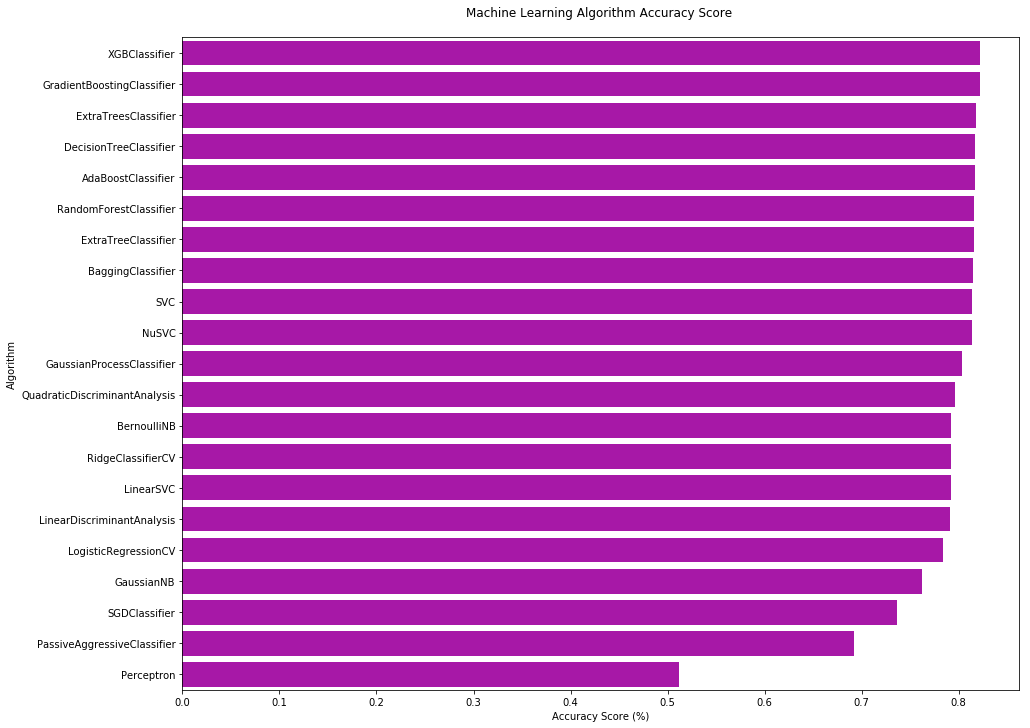

In [173]:
# 要设置sns的画布大小，要在最前面定义好plt.figure(figsize)
plt.figure(figsize=(15,12))
sns.barplot(x='MLA Test Accuracy Mean',y='MLA Name',data=MLA_compare,color='m')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

### 通过GridSearchCV寻找最优化参数

In [174]:
dtree=tree.DecisionTreeClassifier(random_state=0)
base_results=model_selection.cross_validate(dtree,x_train,y_train,cv=cv_split)
dtree.fit(x_train,y_train)

print('BEFORE DT Parameters: ',dtree.get_params())
print('BEFORE DT Training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT Test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*3))
print('\n')

param_grid={'criterion':['gini','entropy'],
            'max_depth':[2,4,6,8,10,None],
            'random_state':[0]}

tune_model=model_selection.GridSearchCV(estimator=dtree,param_grid=param_grid,scoring='roc_auc',cv=cv_split)
tune_model.fit(x_train,y_train)

print('AFTER DT Parameters: ',tune_model.best_params_)
'''[mean_train_score,mean_test_score,std_test_score] 这些键都是在 cv_results_ 中的key，
通过后面跟[tune_model.best_index_]索引我们可以得到相应key的values'''
print('AFTER DT Training w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score mean: {:.2f}'.format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('AFTER DT Test w/bin score 3*std: +/- {:.2f}'.format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.26
BEFORE DT Test w/bin score mean: 81.82
BEFORE DT Test w/bin score 3*std: +/- 0.10


AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'random_state': 0}
AFTER DT Training w/bin score mean: 90.82
AFTER DT Test w/bin score mean: 87.04
AFTER DT Test w/bin score 3*std: +/- 11.94


### 特征选择
    以DT为例进行特征选择

In [176]:
print('BEFORE DT Shape: ',x_train.shape)
print('BEFORE DT Columns: ',x_train.columns)

print('BEFORE DT Training w/bin score mean: {:.2f}'.format(base_results['train_score'].mean()*100))
print('BEFORE DT Test w/bin score mean: {:.2f}'.format(base_results['test_score'].mean()*100))
print('BEFORE DT Test w/bin score 3*std: +/- {:.2f}'.format(base_results['test_score'].std()*3))
print('\n')


dtree_rfe=feature_selection.RFECV(dtree,step=1,scoring='accuracy',cv=cv_split)
dtree_rfe.fit(x_train,y_train)

# 重要的特征会在这个特征的所在位置标志为True，不重要的标志False
x_rfe=x_train.columns.values[dtree_rfe.get_support()]
rfe_result=model_selection.cross_validate(dtree,x_train[x_rfe],y_train,cv=cv_split)

print('AFTER  DT REF Shape: ',x_train[x_rfe].shape)
print('AFTER  DT REF Columns: ',x_rfe)

print('AFTER  DT REF Training w/bin score mean: {:.2f}'.format(rfe_result['train_score'].mean()*100))
print('AFTER  DT REF Test w/bin score mean: {:.2f}'.format(rfe_result['test_score'].mean()*100))
print('AFTER  DT REF Test w/bin score 3*std: +/- {:.2f}'.format(rfe_result['test_score'].std()*3))
print('\n')


# 最优化参数
rfe_tune_model=model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(),param_grid=param_grid,scoring='roc_auc',cv=cv_split)
rfe_tune_model.fit(x_train[x_rfe],y_train)

print('AFTER  DT REF Tune Shape: ',x_train[x_rfe].shape)
print('AFTER  DT REF Tune Columns: ',x_rfe)

print('AFTER  DT REF Tune Training w/bin score mean: {:.2f}'.format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_]*100))
print('AFTER  DT REF Tune Test w/bin score mean: {:.2f}'.format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print('AFTER  DT REF Tune Test w/bin score 3*std: +/- {:.2f}'.format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100))

BEFORE DT Shape:  (891, 8)
BEFORE DT Columns:  Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title',
       'Isalone'],
      dtype='object')
BEFORE DT Training w/bin score mean: 89.26
BEFORE DT Test w/bin score mean: 81.82
BEFORE DT Test w/bin score 3*std: +/- 0.10


AFTER  DT REF Shape:  (891, 6)
AFTER  DT REF Columns:  ['Pclass' 'Sex' 'Age' 'Cabin' 'Embarked' 'Title']
AFTER  DT REF Training w/bin score mean: 87.49
AFTER  DT REF Test w/bin score mean: 82.05
AFTER  DT REF Test w/bin score 3*std: +/- 0.11


AFTER  DT REF Tune Shape:  (891, 6)
AFTER  DT REF Tune Columns:  ['Pclass' 'Sex' 'Age' 'Cabin' 'Embarked' 'Title']
AFTER  DT REF Tune Training w/bin score mean: 90.92
AFTER  DT REF Tune Test w/bin score mean: 86.68
AFTER  DT REF Tune Test w/bin score 3*std: +/- 3.22


In [177]:
reduce_feature=x_train[x_rfe]

In [178]:
dtree_p=rfe_tune_model.predict(x_test[x_rfe])

In [179]:
submit_data=pd.DataFrame({'passengerId':passengerId,'Survived':dtree_p})
submit_data.to_csv("StackingSubmission.csv", index=False)
submit_data[submit_data['Survived']==0].count()

passengerId    279
Survived       279
dtype: int64

### 查看模型之间的相关性
    可以定义一个热图函数

In [180]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

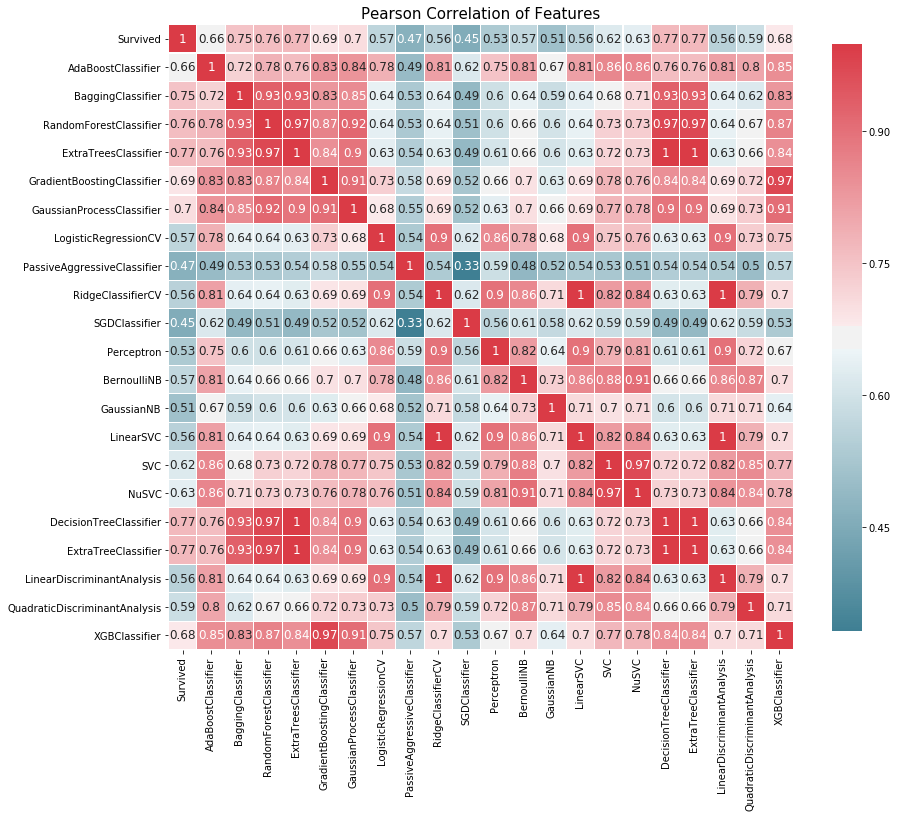

In [181]:
correlation_heatmap(MLA_predict)

#### 选择一些模型进行初始化

In [190]:
vote_est = [
    
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    
    ## Discriminant Analysis
    ('qda', discriminant_analysis.QuadraticDiscriminantAnalysis()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]

#### 定义参数范围，使用GridSearchCV进行参数调优

In [191]:
grid_n_estimators=[1,10,50,100,300,500]
grid_ratio=[.1,.25,.50,.75,1.0]
grid_learn = [.001,.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]
grid_min_samples_leaf=[1,2,3,4,6]


grid_params=[
    [{
        # AdaboostClassifier() https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
        # The beast parameter for AdaBoostClassifier is {'learning_rate': 0.25, 'n_estimators': 50, 'random_state': 0} with runtime of 34.45 secounds
        'n_estimators': [50],
        'learning_rate': [0.25],
        # algorithm ： {'SAMME'，'SAMME.R'}，可选（默认='SAMME.R'） 选择使用什么算法
        'algorithm':['SAMME.R'],       # 'algorithm':['SAMME','SAMME.R'],
        'random_state':grid_seed
    }],
    
    [{
        # BaggingClassifier() https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
#         The beast parameter for BaggingClassifier is {'max_features': 1.0, 'max_samples': 0.75, 'n_estimators': 300, 'random_state': 0} with runtime of 176.11 secounds
        'n_estimators':[300],
        # max_samples ： int或float，optional（default = 1.0）从X中抽取的样本数量，用于训练每个基本估算器。float百分比和int样本个数
        'max_samples':[0.75],
        # 从X中绘制以训练每个基本估算器的特征数。
        'max_features':[1.0],
        'random_state':grid_seed
    }],
    
    [{
        # ExtraTreesClassifier() https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html
#       The beast parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0} with runtime of 473.37 secounds
        'n_estimators': [100],
        # Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 基尼系数和信息熵
        'criterion': ['entropy'],
        'max_depth': [6],
        # 最大特征个数 别超过现有特征数
        'max_features': [1.0],
        'min_samples_split': [2],
        'min_samples_leaf': [3],
        'random_state': grid_seed
    }],
    
    [{
        # GradientBoostingClassifier () https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
        # The beast parameter for GradientBoostingClassifier is 
        # {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with runtime of 336.92 secounds
#         The beast parameter for GradientBoostingClassifier is {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 0.1, 'min_samples_leaf': 3, 'n_estimators': 50, 'random_state': 0} with runtime of 0.84 secounds
        'n_estimators': [300],
        'learning_rate': [0.1],
#         'criterion':['friedman_mse','mse','mae'] , # default friedman_mse
        'max_depth': [2],      
        'random_state': grid_seed,
        'max_features': [.1],        #'max_features': [.1, .3, 1.0],
        'min_samples_leaf': [3],
    }],    
    
        [{
        # RandomForestClassifier () https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#         The beast parameter for RandomForestClassifier is {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 0} with runtime of 111.59 secounds
        'n_estimators': [100],
#         'criterion': grid_criterion,     # default=”gini”
        'max_depth': [6],
        'random_state': grid_seed,
        'min_samples_leaf':[2],
        'max_features':['sqrt'],        # 'max_features':['sqrt','log2'],

    }],    
    
    [{
        # GaussianProcessClassifier () https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html
        # The beast parameter for GaussianProcessClassifier is {'copy_X_train': True, 'max_iter_predict': 10, 'n_restarts_optimizer': 0, 'random_state': 0, 'warm_start': True} with runtime of 153.60 secounds

        # max_iter_predict 牛顿方法中用于近似预测期间后验的最大迭代次数。较小的值将以更差的结果为代价减少计算时间。
        'max_iter_predict': [10],
        'n_restarts_optimizer':[0],
        'warm_start':[True],
        'copy_X_train':[True],
        'random_state': grid_seed
    }],    
    
    [{
        # LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
#         The beast parameter for LogisticRegressionCV is {'fit_intercept': True, 'max_iter': 50, 'random_state': 0, 'solver': 'saga'} with runtime of 28.37 secounds
        # fit_intercept 指定是否应将常量（也称为偏差或截距）添加到决策函数中。
        'fit_intercept': [True], #default: True
        'penalty': ['l1','l2'],
        # solver 用于优化问题的算法。
        'solver': ['saga'], #default: lbfgs , 'solver': 'newton-cg', 'lbfgs', 'sag', 'saga']
#         'penalty': ['l1','l2','elasticnet'],
        'max_iter':[50],
#         'multi_class':['ovr','multinomial','auto'],
        'random_state': grid_seed
     }],


        [{
        # BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
        'fit_prior':grid_bool,
        # alpha （拉普拉斯/ Lidstone）平滑参数（0表示无平滑）。
        'alpha': grid_ratio, #default: 1.0
     }],


        # QuadraticDiscriminantAnalysis  
        [{}],

        [{
        #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#       The beast parameter for KNeighborsClassifier is {'algorithm': 'brute', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'uniform'} with runtime of 49.16 secounds
        'leaf_size':[1],
        'n_neighbors': [5], # default: 5 默认情况下kneighbors查询使用的邻居数。
        'weights': ['uniform'], # default = ‘uniform’用于预测的权重函数 'weights': ['uniform', 'distance']
        'algorithm': ['brute'] # 用于计算最近邻居的算法：'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] 
    }],


        [{
        #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
        #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
#         The beast parameter for SVC is {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0, 'shrinking': True} with runtime of 5.04 secounds
#         'C': [1,2,3,4,5], #default=1.0 惩罚参数
        'C': [1], #default=1.0 惩罚参数
        'gamma': grid_ratio, # default: auto 
#         'decision_function_shape': ['ovo', 'ovr'], #default:ovr
        'decision_function_shape': ['ovo'], #default:ovr
        'probability': [True], # 是否启用概率估计 default：False
        'shrinking':[True],
        'random_state': grid_seed
     }],


    [{
        #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
        # {'colsample_bytree': 1.0, 'learning_rate': 0.25, 'max_depth': 8, 'n_estimators': 100, 'seed': 0, 'subsample': 0.3} with runtime of 2127.47 secounds
        'learning_rate': [0.25], #default: .3
        'max_depth': [8], #default 2
        'n_estimators': grid_n_estimators, 
        'subsample':[.3],
        'colsample_bytree':[1.0],
        'seed': grid_seed  
     }]   
    
]

#### 寻找最优参数

In [192]:
MLA_columns2=['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare2=pd.DataFrame(columns=MLA_columns2)

# 1、之前这里没有加deepcopy，在 MLA_predict[MLA_name]=alg.predict(x_train) 这步中直接修改了 y_train的数据，因为之前我们的y_train也是等于train_data['Survived']
# 2、train_data[['Survived']] 和 train_data['Survived'] 输出的结果是不同的，
# type(train_data[['Survived']].head())是df，type(train_data['Survived'].head())是serise

MLA_predict2=train_data[['Survived']].copy(deep=True)

start_time=time.perf_counter()

for row_index,(clf,params) in enumerate(zip(vote_est,grid_params)):
    one_model_start_time=time.perf_counter()
    
    best_model=model_selection.GridSearchCV(estimator=clf[1],param_grid=params,scoring='roc_auc',cv=cv_split)
    
    """选择是否使用特征选择之后的特征"""
#     best_model.fit(x_train,y_train)
    best_model.fit(reduce_feature,y_train)

    end_time=time.perf_counter()-one_model_start_time
    best_params=best_model.best_params_
    print('The beast parameter for {} is {} with runtime of {:.2f} secounds'.format(clf[1].__class__.__name__,best_params,end_time))
    
    # *********************************************
    MLA_name=clf[1].__class__.__name__
    MLA_compare2.loc[row_index,'MLA Name']=MLA_name
    ''' alg.get_params() type 是一個字典 我们将其转化为str，df行中中不能直接存储dict，字典中的每一个k,v会存储一行'''
    MLA_compare2.loc[row_index,'MLA Parameters']=str(clf[1].get_params())
    
    """选择是否使用特征选择之后的特征"""
#     cv_result2=model_selection.cross_validate(clf[1],x_train,y_train,cv=cv_split)
    cv_result2=model_selection.cross_validate(clf[1],reduce_feature,y_train,cv=cv_split)


    MLA_compare2.loc[row_index,'MLA Train Accuracy Mean']=cv_result2['train_score'].mean()
#     print(cv_result['test_score'])
    MLA_compare2.loc[row_index,'MLA Test Accuracy Mean']=cv_result2['test_score'].mean()    
    MLA_compare2.loc[row_index,'MLA Test Accuracy 3*STD']=cv_result2['test_score'].std()*3   
    MLA_compare2.loc[row_index,'MLA Time']=cv_result2['fit_time'].mean()
    
    """选择是否使用特征选择之后的特征"""
#     clf[1].fit(x_train,y_train)
    clf[1].fit(reduce_feature,y_train)

    # 因为这样我们要新建一列模型预测的数据，所以我们必须要在上面的train_data[['Survived']] 中记得这是一个双括号，
    # 否则那么我们就是在series中拼接,其实是拼不进去的
    
    """选择是否使用特征选择之后的特征"""
#     MLA_predict2[MLA_name]=clf[1].predict(x_train)
    MLA_predict2[MLA_name]=clf[1].predict(reduce_feature)

    # **********************************************

    # 最重要的一步，设置模型参数为最优参数
    clf[1].set_params(**best_params)
    
total_time=time.perf_counter()-start_time
print('Total optimization time was {:.2f} minutes'.format(total_time/60))

MLA_compare2.sort_values(by='MLA Test Accuracy Mean',ascending=False,inplace=True)
MLA_compare2

The beast parameter for AdaBoostClassifier is {'algorithm': 'SAMME.R', 'learning_rate': 0.25, 'n_estimators': 50, 'random_state': 0} with runtime of 0.88 secounds
The beast parameter for BaggingClassifier is {'max_features': 1.0, 'max_samples': 0.75, 'n_estimators': 300, 'random_state': 0} with runtime of 5.06 secounds
The beast parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 0} with runtime of 1.56 secounds
The beast parameter for GradientBoostingClassifier is {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 0.1, 'min_samples_leaf': 3, 'n_estimators': 300, 'random_state': 0} with runtime of 1.49 secounds
The beast parameter for RandomForestClassifier is {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 0} with runtime of 1.58 secounds
The beast parameter for GaussianProcessClassifier is {'copy_X

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
11,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.847363,0.827203,0.0993783,0.081078
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.854845,0.82608,0.0790967,0.0704643
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.822422,0.814844,0.124073,0.0760564
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.874923,0.812597,0.0899242,0.0126173
10,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.829407,0.811473,0.108029,0.0631729
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.853224,0.807016,0.129373,0.432938
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.872927,0.806991,0.106807,0.0146629
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.872803,0.803608,0.0690039,0.0139605
8,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.808206,0.800212,0.10867,0.00179746
7,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.791122,0.787865,0.113459,0.00214942


In [183]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100,
          n_jobs=None, penalty='l1', random_state=None,
          tol=0.0001, verbose=0, warm_start=False)

In [186]:
logreg.fit(reduce_feature,y_train)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [187]:
logreg.score(reduce_feature,y_train)

0.7968574635241302

In [188]:
logreg_cv_result=model_selection.cross_validate(logreg,reduce_feature,y_train,cv=cv_split)

In [189]:
logreg_cv_result['train_score'].mean()

0.7933663033427667

In [78]:
new_vote_est=[
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
#     ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
#     ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
#     ('bnb', naive_bayes.BernoulliNB()),
    
    ## Discriminant Analysis
#     ('qda', discriminant_analysis.QuadraticDiscriminantAnalysis()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
#     ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())
]

#### 使用分数最高的模型单独进行预测

In [193]:
GradientBoosting_p=vote_est[3][1].predict(x_test[x_rfe])
submit_data=pd.DataFrame({'passengerId':passengerId,'Survived':GradientBoosting_p})
submit_data.to_csv("StackingSubmission.csv", index=False)
submit_data[submit_data['Survived']==0].count()

passengerId    277
Survived       277
dtype: int64

### 投票预测

In [79]:
grid_hard = ensemble.VotingClassifier(estimators = new_vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, x_train[x_rfe],y_train, cv  = cv_split)
grid_hard.fit(x_train[x_rfe],y_train)

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = new_vote_est, voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, x_train[x_rfe],y_train, cv  = cv_split)
grid_soft.fit(x_train[x_rfe],y_train)

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 84.42
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 81.15
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 11.14
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.56
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 81.26
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 11.95
----------


#### 预测超过80%的分数的模型进行预测

In [81]:
predictions= grid_hard.predict(x_test[x_rfe])
submit_data=pd.DataFrame({'passengerId':passengerId,'Survived':predictions})
submit_data[submit_data['Survived']==0].count()

passengerId    286
Survived       286
dtype: int64

In [71]:
submit_data.to_csv("sixmodelSubmission.csv", index=False)

In [72]:
grid_hard = ensemble.VotingClassifier(estimators = vote_est  , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, x_train[x_rfe],y_train, cv  = cv_split)
grid_hard.fit(x_train[x_rfe],y_train)

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, x_train[x_rfe],y_train, cv  = cv_split)
grid_soft.fit(x_train[x_rfe],y_train)

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 83.13
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 81.93
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 11.13
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 82.90
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.15
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 11.72
----------


In [ ]:
data_val=np.zeros((ntest,))

In [73]:
predictions= grid_hard.predict(x_test[x_rfe])
submit_data=pd.DataFrame({'passengerId':passengerId,'Survived':predictions})
submit_data[submit_data['Survived']==0].count()

passengerId    297
Survived       297
dtype: int64

In [ ]:
submit_data.to_csv("StackingSubmission.csv", index=False)

 The beast parameter for AdaBoostClassifier is {'learning_rate': 0.05, 'n_estimators': 300, 'random_state': 0} with runtime of 39.97 secounds

 The beast parameter for BaggingClassifier is {'max_samples': 0.1, 'n_estimators': 300, 'random_state': 0} with runtime of 35.60 secounds

 The beast parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with runtime of 80.14 secounds

 The beast parameter for GradientBoostingClassifier is {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with runtime of 336.92 secounds

 The beast parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with runtime of 82.48 secounds

 The beast parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with runtime of 22.09 secounds

The beast parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'newton-cg'} with runtime of 8.14 secounds

The beast parameter for BernoulliNB is {'alpha': 0.75} with runtime of 0.24 secounds

 The beast parameter for GaussianNB is {} with runtime of 0.05 secounds

 The beast parameter for KNeighborsClassifier is {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'} with runtime of 8.13 secounds

 The beast parameter for SVC is {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0} with runtime of 35.65 secounds

 The beast parameter for XGBClassifier is {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 100, 'seed': 0} with runtime of 156.16 secounds
 
Total optimization time was 32.75 minutes